# **GEOG 527 (SP21):**
## Geospatial AI & Machine Learning
## **Lab 01**: Introduction to GeoAI and Geospatial Big Data

## (response sheet)
 
### Due:  Sunday, 28 Mar 2021 at 11:59 PM
#### Value:  6 points
#### Import/Install libraries on Colab: [Examples](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 6.4MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-cp37-none-any.whl size=31633 sha256=aa7a415861e19c714d34fd9a7165d10c1c262ab3943e3528f532d09706a81eef
  Stored in directory: /root/.cache/pip/wheels/3b/5c/fa/92ee330d259e8fa5bedbd53f67040710fe81cfa463b8711d26
Successfully built libarchive


# Part 1 - Basic Python Practice
## Complete the following Python warm-up activities. If you have need more practice or help, please take a look at the [w3c Python tutorial](https://www.w3schools.com/python/). (3 PT)

## 1a. Downdload the World Arable Land data from [here](https://api.worldbank.org/v2/en/indicator/AG.LND.ARBL.ZS?downloadformat=csv). You can also search "Arable land (% of land area)" on the [World Bank Database](https://data.worldbank.org/indicator)  Clean the data, load the data in Python, and answer the following questions (1 PT):


1.   What is the median value of arable land (%) in 1980 in this csv table?
2.   What is the average value of arable land (%) in lower middle income coutnries in 2000?



In [219]:
# Answer

##################### Data Cleaning ########################
import pandas as pd 
import statistics

#READ data from CSV file
data = pd.read_csv('/content/API_AG.LND.ARBL.ZS_DS2_en_csv_v2_2056096.csv', delimiter=',' , error_bad_lines=False, header=2)

#drop the columns with morethan 50 NaN
data.dropna(axis='columns',thresh=50, inplace=True)

#Fill NaN with the mean value of the columns
for col_name in data.columns [4:]:
  data[col_name].fillna((data[col_name].mean()), inplace=True)

#calculate Median
print("Median value of arable land (%) in 1980:")
statistics.median(data['1980'])

Median value of arable land (%) in 1980:


11.465946079869699

In [218]:
#Load income group data 
income_ind = pd.read_csv('/content/Metadata_Country_API_AG.LND.ARBL.ZS_DS2_en_csv_v2_2056096.csv', delimiter=',' , error_bad_lines=False, header=0)

#only keep in country code and income group and region
income_ind = income_ind[["Country Code", "IncomeGroup","Region"]]

#Join data with the income group data on the country code of both tables
income_ind_join = income_ind.set_index("Country Code").join(data.set_index('Country Code'))

#Calculate mean
print("Average value of arable land (%) in lower middle income coutnries in 2000:")
statistics.mean(income_ind_join[income_ind_join["IncomeGroup"]== "Lower middle income"]["2000"])

Average value of arable land (%) in lower middle income coutnries in 2000:


15.227867044516065

## 1b. Plot the histrogram ([help](https://matplotlib.org/stable/gallery/statistics/hist.html)) based on the distribution of all arable land (%) values in 2010 for all countries in Sub-Saharan Africa. (1 PT).
## Note: Instead of using matplotlib, you can choose other libraries.

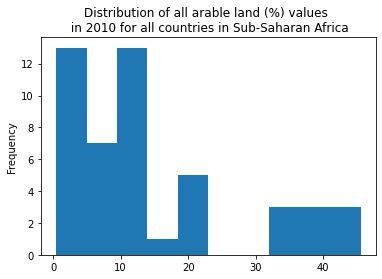

In [54]:
# Answer
# Use Pandas dataframe to plot histogram
ax = income_ind_join[income_ind_join["Region"]== "Sub-Saharan Africa"]["2010"].plot(title='Distribution of all arable land (%) values \n in 2010 for all countries in Sub-Saharan Africa',kind="hist")


## 1c. Read the history about [Rose Diagram](https://www.historyofinformation.com/detail.php?entryid=3815) and this [tutorial](https://plotly.com/python/wind-rose-charts/), create your own rose diagram. You can modify it based on your own interest, however, do not use the original data provided in this tutorial. (1 PT)
## Note: do not use the data provided in this tutorial. You can smulate or generate your own values. Instead of using plotly, you can choose other libraries.

In [109]:
def count_and_merge(n, bearings):
    # make twice as many bins as desired, then merge them in pairs
    # prevents bin-edge effects around common values like 0° and 90°
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins)
    
    # move the last bin to the front, so eg 0.01° and 359.99° will be binned together
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

In [216]:
import numpy as np
import pickle

# The data is generated based on the research in: https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1
#The notebook provide the procedure of data generation: https://drive.google.com/file/d/1wjzCpn9ecirXFYf2UyUCOKYtFnjMbmHN/view?usp=sharing
with open('/content/gdrive/MyDrive/GEOG 527/Week1/atlanta_orieantation.npy', 'rb') as handle:
    Atlanta_orientation = pickle.load(handle)

state_name = np.array(list(Atlanta_orientation.keys())) 
results = np.array([])

for name in state_name :
  print(name)
  bins = np.arange(36 + 1) * 360 / 36
  count = count_and_merge(36, Atlanta_orientation[name])
  if(name == "Atlanta"):
    results = [count]
  results = np.append(results, [count], axis=0)


Atlanta
Buffalo
Cleveland
Denver
Las Vegas
Miami
Minneapolis
Washington


In [226]:
# Answer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=4, specs=[[{'type': 'polar'}, {'type': 'polar'},{'type': 'polar'}, {'type': 'polar'}],[{'type': 'polar'}, {'type': 'polar'},{'type': 'polar'}, {'type': 'polar'}]])

fig.add_trace(go.Barpolar( r=results[0], name=state_name[0], marker_color='red' ), row=1, col=1)
fig.add_trace(go.Barpolar( r=results[1], name=state_name[1], marker_color='green' ), row=1, col=2)
fig.add_trace(go.Barpolar( r=results[2], name=state_name[2], marker_color='blue' ), row=1, col=3)
fig.add_trace(go.Barpolar( r=results[3], name=state_name[3], marker_color='yellow' ), row=1, col=4)
fig.add_trace(go.Barpolar( r=results[4], name=state_name[4], marker_color='black' ), row=2, col=1)
fig.add_trace(go.Barpolar( r=results[5], name=state_name[5], marker_color='pink' ), row=2, col=2)
fig.add_trace(go.Barpolar( r=results[6], name=state_name[6], marker_color='orange' ), row=2, col=3)
fig.add_trace(go.Barpolar( r=results[7], name=state_name[7], marker_color='lime' ), row=2, col=4)

fig.update_layout( height=700, width=1200, title='Road Orientation in States in USA', font_size=11, legend_font_size=11, polar_radialaxis_ticksuffix='', polar_angularaxis_rotation=90, )
fig.show()

## 2a. Read the information about Deep Learning ([link](https://developer.nvidia.com/deep-learning)) and explain (1 PT):


1.   What are the differences between machine learning and deep learning?
2.   Why [GPUs](https://en.wikipedia.org/wiki/Graphics_processing_unit) are important for machine learning and deep learning tasks?



# **Answer**
Deep learning is a subset of Machine Learning. Deep learning can automatically learn data representations from data itself without hard-coding the rules or human domain knowledge. 

GPU helps to speed up the training process of deep learning training. Training deep learning could take days or week on CPU but only hours on GPU.

## 2b. Read this paper -"*Breiman, L. (2001). Statistical modeling: The two cultures (with comments and a rejoinder by the author). Statistical science, 16(3), 199-231.*" and explain (2 PT):

1.   What are the differences between the data model and the algorithm model?


# **Answer**

### Data model 
The samples is assumed to be chosen stochastically from whole data inside the blackbox. Then the samples are used to estimate the parameters for preditction. The model can be validated by goodness-of-fit test.
 
### Algorithm model
The model of prediction is unknown. The prediction input, X, will produde the prediction results, y. And the performance will be evaluated by measure the prediction accuracy.